# **Objective - Data Cleaning and EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob, Word, Blobber
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datascience/News Recommender/finalcleandata.csv')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datascience/News Recommender/bbc_toi_yahoo_stats_feats.csv')

In [ ]:
data.head()

,heading,content,heading_polarity,content_polarity,number_of_words,number_of_sentences,average_word_length,number_of_characters,asl,asw,flesch_ease_test_score,flesch_kincaid_grade_score
0,domestic abuse: swansea man jailed for murderi...,a man has been jailed for life for battering h...,0.00,-0.081640,719,28,4.742698,4128,25.678571,1.539638,50.517842,12.592376
1,covid-19: how india failed to prevent a deadly...,"in early march, india's health minister harsh ...",-0.25,0.035661,1199,63,5.106756,7321,19.031746,1.733945,40.826035,12.292931
2,"northampton blaze 'cruel blow', say firm's owners",two friends who spent 10 years building up the...,-0.60,-0.199242,306,12,5.032680,1845,25.500000,1.604575,45.205441,13.288987
3,einstein handwritten letter with equation fetc...,a letter written by albert einstein containing...,0.00,0.165000,236,11,5.254237,1475,21.454545,1.750000,37.008636,13.427273
4,florida high school alters 80 'immodest' yearb...,a florida high school is facing a backlash for...,0.16,0.043386,665,25,5.001504,3990,26.600000,1.578947,46.257053,13.415579


In [ ]:
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    texts = [w for w in text if w.isalpha()]
    texts = " ".join(texts)
    return texts

In [ ]:
# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

In [ ]:
# data['headline_clean'] = data['Headline'].apply(lambda x: x.lower())
data['headline_clean'] = data['heading'].apply(lambda x: x.lower())

In [ ]:
data['headline_clean'] = data['headline_clean'].apply(lambda x: remove_punctuation(x))

In [ ]:
data['headline_clean'] = data['headline_clean'].apply(lambda x: remove_stop_words(x))

In [ ]:
# data['cleaned'] = data['News'].apply(lambda x: x.lower())
data['cleaned'] = data['content'].apply(lambda x: x.lower())

In [ ]:
data['cleaned'] = data['cleaned'].apply(lambda x: remove_punctuation(x))


In [ ]:
data['cleaned'] = data['cleaned'].apply(lambda x: remove_stop_words(x))


In [ ]:
data.head()

,heading,content,heading_polarity,content_polarity,number_of_words,number_of_sentences,average_word_length,number_of_characters,asl,asw,flesch_ease_test_score,flesch_kincaid_grade_score,headline_clean,cleaned
0,domestic abuse: swansea man jailed for murderi...,a man has been jailed for life for battering h...,0.00,-0.081640,719,28,4.742698,4128,25.678571,1.539638,50.517842,12.592376,domestic abuse swansea man jailed murdering pa...,man jailed life battering partner death feroci...
1,covid-19: how india failed to prevent a deadly...,"in early march, india's health minister harsh ...",-0.25,0.035661,1199,63,5.106756,7321,19.031746,1.733945,40.826035,12.292931,covid india failed prevent deadly second wave,early march india health minister harsh vardha...
2,"northampton blaze 'cruel blow', say firm's owners",two friends who spent 10 years building up the...,-0.60,-0.199242,306,12,5.032680,1845,25.500000,1.604575,45.205441,13.288987,northampton blaze cruel blow say firm owners,two friends spent years building business said...
3,einstein handwritten letter with equation fetc...,a letter written by albert einstein containing...,0.00,0.165000,236,11,5.254237,1475,21.454545,1.750000,37.008636,13.427273,einstein handwritten letter equation fetches,letter written albert einstein containing e eq...
4,florida high school alters 80 'immodest' yearb...,a florida high school is facing a backlash for...,0.16,0.043386,665,25,5.001504,3990,26.600000,1.578947,46.257053,13.415579,florida high school alters immodest yearbook p...,florida high school facing backlash altering y...


In [ ]:
data = data.drop_duplicates(subset='headline_clean', keep='first', inplace=False)
data = data.drop_duplicates(subset='cleaned', keep='first', inplace=False)

In [ ]:
# data.to_csv('/content/drive/MyDrive/Colab Notebooks/datascience/News Recommender/cleandata.csv', index=False)

In [ ]:
data['cleaned'] = data['cleaned']+' '+data['headline_clean']

In [ ]:
data.describe(include ='object')

,heading,content,headline_clean,cleaned
count,7887,7887,7887,7887
unique,7887,7887,7887,7887
top,madhya pradesh issues licence for production o...,hong kong: hundreds of people gathered near a ...,lic march policy sales grow times india,new york dominic thiem says dedicated whole li...
freq,1,1,1,1


In [ ]:
data.drop(columns='article_id', inplace = True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english').fit(data['cleaned'])
bag_of_words = vec.transform(data['cleaned'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

KeyboardInterrupt: ignored

In [ ]:
words_freq[0:20]

[('said', 32780),
 ('people', 12320),
 ('india', 11035),
 ('year', 10370),
 ('new', 9665),
 ('government', 9049),
 ('covid', 8813),
 ('uk', 6985),
 ('time', 6686),
 ('says', 6618),
 ('mr', 6175),
 ('bbc', 5718),
 ('years', 5405),
 ('rs', 5062),
 ('like', 4839),
 ('pandemic', 4493),
 ('told', 4416),
 ('country', 4078),
 ('home', 3910),
 ('crore', 3901)]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
tf = TfidfVectorizer(analyzer='word',stop_words='english',min_df=30, max_df = 0.20,token_pattern='[a-zA-Z0-9]{3,}', use_idf=True,ngram_range=(1,3))
tfidf_matrix = tf.fit_transform(data['cleaned'])

In [ ]:
pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names())

,aadhaar,abandoned,abdul,aberdeen,abhishek,abide,ability,able,able make,able meet,aboard,abroad,absence,absent,absolute,absolutely,absorb,abu,abundant,abuse,abused,abuses,abusive,academic,academics,academy,accelerate,accelerated,accelerating,accept,acceptable,acceptance,accepted,accepting,access,accessed,accessible,accessing,accident,accidents,...,years time,years year,yellow,yes,yesterday,yield,yields,yoga,yojana,york,york times,yorkshire,yorkshire facebook,yorkshire facebook twitter,yorkslincs,yorkslincs news,yorkslincs news bbc,young,young children,young people,young woman,younger,younger people,youngest,yourquestions,yourquestions bbc,yourquestions bbc include,youth,youtube,youtube listen,youtube listen newsbeat,zealand,zero,zero carbon,zero emissions,zhao,zone,zones,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.109679,0.0,0.0,0.049166,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054877,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.041799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.032987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041575,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7885,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
#Cosine Similarity

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      max_iter=500,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(tfidf_matrix)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=500,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [ ]:
lda_model.n_components

10

In [ ]:
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(100).style.applymap(color_green).applymap(make_bold)
df_document_topics


In [ ]:
def show_topics(lda_model=lda_model, n_words=20):
    keywords = np.array(tf.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(list(zip(keywords.take(top_keyword_locs),topic_weights.take(top_keyword_locs))))
    return topic_keywords

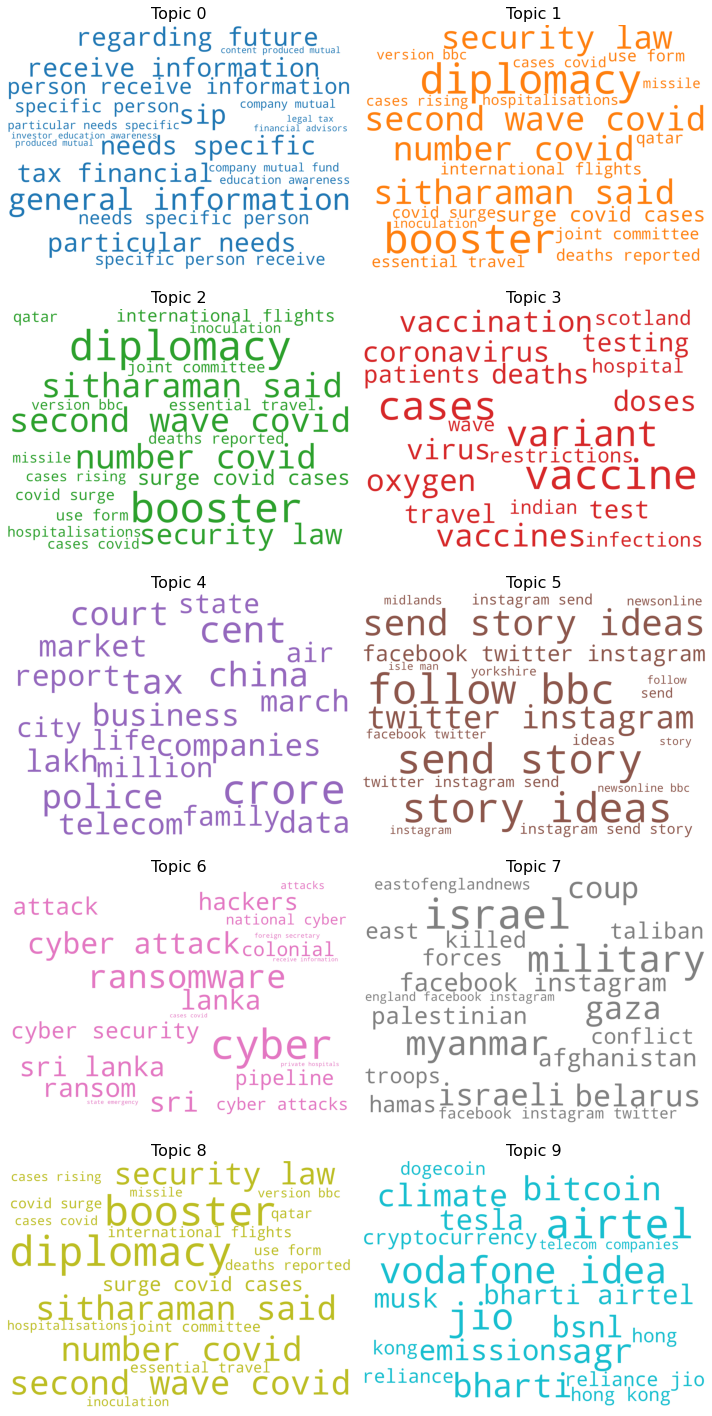

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = show_topics(lda_model)

fig, axes = plt.subplots(5, 2, figsize=(10,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
topic_keywords = show_topics(lda_model=lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,"(general information, 2.5267483323830118)","(sip, 1.9445220618180785)","(particular needs, 1.8163277978852466)","(receive information, 1.8045942215939197)","(needs specific, 1.7980221171882742)","(regarding future, 1.741476801791923)","(tax financial, 1.7370758073031143)","(person receive information, 1.7236711445150688)","(needs specific person, 1.7236711445150688)","(specific person, 1.7236711445150688)","(specific person receive, 1.7236711445150688)","(particular needs specific, 1.7236711445150688)","(company mutual fund, 1.7190917357850521)","(company mutual, 1.7190917357850521)","(education awareness, 1.7150959057512756)"
Topic 1,"(booster, 0.10000088410841737)","(diplomacy, 0.10000065217486107)","(second wave covid, 0.10000061384509133)","(number covid, 0.10000059299538085)","(sitharaman said, 0.10000054017154042)","(security law, 0.10000050910708419)","(surge covid cases, 0.10000046004007432)","(international flights, 0.10000043350935285)","(joint committee, 0.10000042322855617)","(essential travel, 0.10000042043263287)","(deaths reported, 0.10000040908702588)","(qatar, 0.10000038208907545)","(use form, 0.10000038151799219)","(covid surge, 0.10000034988570763)","(hospitalisations, 0.10000033547413742)"
Topic 2,"(booster, 0.10000088410841737)","(diplomacy, 0.10000065217486107)","(second wave covid, 0.10000061384509133)","(number covid, 0.10000059299538085)","(sitharaman said, 0.10000054017154042)","(security law, 0.10000050910708419)","(surge covid cases, 0.10000046004007432)","(international flights, 0.10000043350935285)","(joint committee, 0.10000042322855617)","(essential travel, 0.10000042043263287)","(deaths reported, 0.10000040908702588)","(qatar, 0.10000038208907545)","(use form, 0.10000038151799219)","(covid surge, 0.10000034988570763)","(hospitalisations, 0.10000033547413742)"
Topic 3,"(vaccine, 76.5638035140986)","(cases, 71.49259636444017)","(variant, 58.01344039290901)","(vaccines, 42.76672591988841)","(oxygen, 40.58930902279155)","(vaccination, 37.394498935839465)","(coronavirus, 34.79544154040504)","(virus, 34.550051481228074)","(doses, 34.28780864533914)","(deaths, 32.372116139579475)","(travel, 28.81331550364463)","(testing, 28.623315311409105)","(test, 28.438079723333917)","(patients, 25.639721432701222)","(restrictions, 24.99646765241)"
Topic 4,"(crore, 127.09183869787263)","(cent, 98.78542181432202)","(tax, 88.43381898371725)","(china, 82.6270708970964)","(police, 82.4750542656606)","(court, 78.79374898268863)","(companies, 67.78641167304538)","(business, 67.60295602636252)","(lakh, 67.44142592037751)","(market, 65.37257015591217)","(data, 64.3065104426911)","(telecom, 63.99157723472108)","(march, 63.11382463687811)","(report, 62.490716219224126)","(million, 62.454172929061194)"
Topic 5,"(follow bbc, 18.813582815783164)","(send story, 18.742067365333416)","(story ideas, 18.742067365333416)","(send story ideas, 18.742067365333416)","(twitter instagram, 17.8109359138898)","(facebook twitter instagram, 17.68758360610774)","(twitter instagram send, 17.648118629608227)","(instagram send story, 16.4460041405509)","(instagram send, 16.4460041405509)","(ideas, 16.35473393803979)","(send, 14.277097271979015)","(facebook twitter, 12.393323364463493)","(newsonline, 12.327878744085325)","(yorkshire, 11.596732128171318)","(midlands, 11.471261791872738)"
Topic 6,"(cyber, 12.802822616930337)","(ransomware, 7.703173510302027)","(cyber attack, 6.124777899677428)","(sri, 5.315232166878551)","(sri lanka, 5.12871167485135)","(lanka, 5.12871167485135)","(ransom, 4.720772420157452)","(attack, 3.948096625803765)","(hackers, 3.9202829205010805)","(cyber security, 3.468590293804466)","(pipeline, 2.915005080379779)","(colonial, 2.5626586399200573)","(cyber attacks, 1.9542893459119555)","(national cyber, 1.3441454153998806)","(attacks, 0.595590147724449)"
Topic 7,"(israel, 31.102798115052337)","(military, 24.94

In [ ]:
df_document_topic.drop(columns='dominant_topic',inplace=True)
# print(list(df_document_topic.iloc[0]))

KeyError: ignored

In [ ]:
# cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_similarities = linear_kernel(df_document_topic, df_document_topic)

In [ ]:
cosine_similarities[2]

array([0.20604699, 0.25924908, 1.        , ..., 0.00714362, 0.03907568,
       0.01107092])

In [ ]:
similarity_score = list(enumerate(cosine_similarities[0]))
print(similarity_score)

[(0, 1.0), (1, 0.332142852766493), (2, 0.2245866174315352), (3, 0.02954555271455694), (4, 0.06652456739923485), (5, 0.23984918668508842), (6, 0.13705125398512422), (7, 0.2051777145880388), (8, 0.45747958547355455), (9, 0.08752498255785639), (10, 0.12439130338707077), (11, 0.4368057447209094), (12, 0.15547911376207071), (13, 0.14443244604225983), (14, 0.18644225926040728), (15, 0.6238528459913589), (16, 0.11079621256915576), (17, 0.07357139727259242), (18, 0.13454857809772897), (19, 0.0906249374608021), (20, 0.5436370737954784), (21, 0.089248584387094), (22, 0.2015541154975816), (23, 0.1384135942227061), (24, 0.022811674646760607), (25, 0.5555218226423811), (26, 0.025791109886325953), (27, 0.13006931839021554), (28, 0.08838899491456194), (29, 0.0544960163235723), (30, 0.4705748696393475), (31, 0.20140056983566368), (32, 0.19515178134606145), (33, 0.03435325681258978), (34, 0.6110291692664185), (35, 0.05579262853565995), (36, 0.06460434495210968), (37, 0.0515107199783981), (38, 0.0760487

In [ ]:
# def recommendation(idx1, idx2, idx3,no_of_news_article):
#     #get similarity values with other articles
#     similarity_score1 = list(enumerate(cosine_similarities[idx1]))
#     similarity_score2 = list(enumerate(cosine_similarities[idx2]))
#     similarity_score3 = list(enumerate(cosine_similarities[idx3]))

#     similarity_score1 = sorted(similarity_score1, key=lambda x: x[1], reverse=True)
#     similarity_score2 = sorted(similarity_score2, key=lambda x: x[1], reverse=True)
#     similarity_score3 = sorted(similarity_score3, key=lambda x: x[1], reverse=True)
#     # Get the scores of the n most similar news articles. Ignore the first document.
    
#     similarity_score1 = similarity_score1[1:int(no_of_news_article/1)+1]
#     similarity_score2 = similarity_score2[1:int(no_of_news_article/3)+1]
#     similarity_score3 = similarity_score3[1:int(no_of_news_article/3)+1]
    
#     print("Article 1 Read -- " + data['headline'].iloc[idx1])
#     print("Article 2 Read -- " + data['headline'].iloc[idx2])
#     print("Article 3 Read -- " + data['headline'].iloc[idx3])
#     print(" ---------------------------------------------------------- ")
#     news_indices1 = [i[0] for i in similarity_score1]
#     for i in range(len(news_indices1)):

#         print("Recomendation "+ str(i+1)+" --- " +str(news_indices1[i])+" : "+data['headline'].iloc[news_indices1[i]] +" score -- "+ str(similarity_score1[i][1]))

#     news_indices2 = [i[0] for i in similarity_score2]
#     for i in range(len(news_indices2)):

#         print("Recomendation "+ str(i+1)+" --- " +str(news_indices2[i])+" : "+data['headline'].iloc[news_indices2[i]] +" score -- "+ str(similarity_score2[i][1]))

#     news_indices3 = [i[0] for i in similarity_score3]
#     for i in range(len(news_indices3)):

#         print("Recomendation "+ str(i+1)+" --- " +str(news_indices3[i])+" : "+data['headline'].iloc[news_indices3[i]] +" score -- "+ str(similarity_score3[i][1]))

In [ ]:
# idx=1300
# no_of_news_article=10
# recommendation(658,256,1359,no_of_news_article)

In [ ]:
# def recommended_articles(curr_idx,num_articles,reverse):
#   #get similarity values with other articles
#     article_ids=[]
#     similarity_score1 = list(enumerate(cosine_similarities[curr_idx]))

#     similarity_score1 = sorted(similarity_score1, key=lambda x: x[1], reverse=reverse)
#     # Get the scores of the n most similar news articles. Ignore the first document.
#     randnumber = random.randint(0,data.shape[0])
#     similarity_score1 = similarity_score1[1:num_articles+1]
#     news_indices1 = [i[0] for i in similarity_score1]
#     # print("\n Read: ",data['Headline'].iloc[curr_idx],"\n")
#     for i in range(len(news_indices1)):
#       # print("Recommended: ",data['Headline'][news_indices1[i]])
#       # print()
#       article_ids+= [news_indices1[i]]
#     return article_ids

In [ ]:
def recommended_articles(curr_idx,num_articles,articles_read,recommendationlist,reverse):
  #get similarity values with other articles
    article_ids_final = []
    article_ids=[]
    similarity_score1 = list(enumerate(cosine_similarities[curr_idx]))
    similarity_score1 = sorted(similarity_score1, key=lambda x: x[1], reverse=reverse)
    # Get the scores of the n most similar news articles. Ignore the first document.
    randomnum = random.randint(1,20)
    end = num_articles+randomnum
    similarity_score2 = similarity_score1[randomnum:end]
    news_indices1 = [i[0] for i in similarity_score2]

    for i in range(len(news_indices1)):
      article_ids+= [news_indices1[i]]
    x = len(news_indices1)

    for id in article_ids:
      while (id in articles_read) or (id in recommendationlist):
        # print(recommendationlist)
        id = (similarity_score1[x])[0]
        x +=1
      article_ids_final.append(id)

    return article_ids_final

In [ ]:
idx=5000

no_of_news_article=10
articles_read_by_user = []
recommendationlist = []
articlelist = recommended_articles(idx,no_of_news_article,articles_read_by_user,recommendationlist,True)
print("NEWS: ", data['heading'].iloc[idx],"\n")
for articleid in articlelist:
  print("\n Read: ",data['heading'].iloc[articleid],"\n")

NEWS:  virus lockdown in australia's second-largest city extended by a week - times of india 


 Read:  uganda's yoweri museveni: how an ex-rebel has stayed in power for 35 years 


 Read:  could my mum’s toaster help me care for her? 


 Read:  piccadilly 1965: how six indian friends found their feet in the uk 


 Read:  what's behind the rise of qanon in the uk? 


 Read:  festivals 2021: which ones are still going ahead? 


 Read:  brit awards 2021: great show, shame about the videos 


 Read:  china mac: from attempted murder to leading a protest movement 


 Read:  in a pandemic it isn't a case of health v wealth 


 Read:  'talk to me': a train driver asking men to open up 


 Read:  'we couldn’t afford fertility treatment so we risked finding a sperm donor on facebook' 



In [ ]:
import random, math, pprint, json, yaml

def articleread(articleid):
  # print("\n Read: ",data['Headline'].iloc[articleid],"\n")
  print("\n Read: ",data['heading'].iloc[articleid],"\n")

def prob(x):
  return math.exp(-x)

def max_rating(userdict, usernumber, article = []):
  maxr = 0
  articlenum = None
  for key, val in userdict[usernumber].items():
    for article_id, rating in userdict[usernumber][key].items():
      # print("Id and ranting", article_id, rating)
      if rating >= maxr and article_id not in article:
        articlenum = article_id
        maxr = rating
  # print("max and id", maxr, articlenum)
  return maxr,articlenum

def select_article(lst, articledict, articles_read_by_user):
  # print("List",lst)
  randomnum = random.randint(0, 9)
  while lst[randomnum] in articles_read_by_user:
    randomnum = random.randint(0, 9)
  # print("randomnumber",randomnum)
  article_number = lst[randomnum]
  rating=random.randint(1,5)
  articledict[article_number] = rating
  articles_read_by_user.append(article_number)
  # print("Article dict and total list",articledict, articles_read_by_user)
  return articledict, articles_read_by_user

num_users=random.randint(10,20)
rating_threshold=2
userdict={}

for user in range(1,num_users+1):
  print('User', user)
  articles_read_by_user = []
  userdict[user] = {}
  # print(userdict)
  sessiondict = {}
  session_num = 0
  probab = random.random()

  while prob(session_num) >= probab:
    print("Session",session_num+1)
    sessiondict[session_num+1] = {}
    articledict = {}
    num_articles=random.randint(5,10)
    i=1
    num_of_articles_read = len(articles_read_by_user)

    while (i<=num_articles):

      if num_of_articles_read == 0:
        i+=1
        randomlist = random.sample(range(0, data.shape[0]), 10)
        articledict, articles_read_by_user = select_article(randomlist, articledict, articles_read_by_user)
        articleread(articles_read_by_user[-1])

      elif num_of_articles_read <= 2 :
        i+=1
        article_rating, article_to_predict_from = max_rating(userdict, user)
        # print(article_rating,"|||||", article_to_predict_from)
        article_recommendation_ids = []
        if article_rating <= rating_threshold:
          article_recommendation_ids = recommended_articles(article_to_predict_from,5,articles_read_by_user,article_recommendation_ids,False)
          # print("||||||||||||||||||||||||",article_recommendation_ids)
          randomlist = random.sample(range(0, data.shape[0]), 5)
          article_recommendation_ids = article_recommendation_ids + randomlist
          # print("++++++++++++++++",article_recommendation_ids)
          articledict, articles_read_by_user = select_article(article_recommendation_ids, articledict, articles_read_by_user)
          articleread(articles_read_by_user[-1])

        else:
          article_recommendation_ids = recommended_articles(article_to_predict_from,7,articles_read_by_user,article_recommendation_ids,True)
          # print("||||||||||||||||||||||||||||",article_recommendation_ids)
          randomlist = random.sample(range(0, data.shape[0]), 3)
          article_recommendation_ids = article_recommendation_ids+randomlist
          # print("+++++++++++",article_recommendation_ids)
          articledict, articles_read_by_user = select_article(article_recommendation_ids, articledict, articles_read_by_user)
          articleread(articles_read_by_user[-1])

      else:
        i+=1
        articles_suggested = []
        # article_rating, article_to_predict_from = max_rating(userdict, user, articles_suggested)
        # articles_suggested.append(article_to_predict_from)
        # print(article_rating,"|||||", article_to_predict_from)
        article_recommendation_ids = []

        for n in range(3):
          article_rating, article_to_predict_from = max_rating(userdict, user, articles_suggested)
          articles_suggested.append(article_to_predict_from)

          if article_rating <= rating_threshold:
            article_recommendation_ids = article_recommendation_ids + recommended_articles(article_to_predict_from,2,articles_read_by_user,article_recommendation_ids,False)
            # print("------------", article_recommendation_ids)

          else:
            article_recommendation_ids = article_recommendation_ids + recommended_articles(article_to_predict_from,3,articles_read_by_user,article_recommendation_ids,True)
            # print("--------------", article_recommendation_ids)

        randomlist = random.sample(range(1, data.shape[0]), 10-len(article_recommendation_ids))
        article_recommendation_ids = article_recommendation_ids+randomlist
        # print("-------/////////",article_recommendation_ids)
        articledict, articles_read_by_user = select_article(article_recommendation_ids, articledict, articles_read_by_user)
        articleread(articles_read_by_user[-1])       

    sessiondict[session_num+1] = articledict
    session_num = session_num + 1
    userdict[user] = sessiondict
    # print("nonfinal", userdict)

# pprint.pprint(userdict)
print(json.dumps(userdict, indent= 4))
# print(yaml.dump(userdict, default_flow_style=False))

User 1
Session 1

 Read:  spy bosses warn of cyber-attacks on smart cities 


 Read:  lockdown impact on business: three of four ceos fear partial lockdowns will affect business 


 Read:  7 held with 6kg of uranium in jharkhand 


 Read:  spectrum auction: cabinet approves next round of spectrum auction 


 Read:  as economy recovers, survey shows 59% firms in india intend to give salary increments in 2021 - times of india 


 Read:  flooded skewen residents in 'constant fear' of a repeat 

Session 2

 Read:  coal plant insurance faces green hurdles - times of india 


 Read:  ravi shankar prasad: government will give 5g spectrum for trials to all players 


 Read:  wholesale inflation:  wpi inflation rises to 4.17% in february on costlier food, fuel - times of india 


 Read:  china 'can save $1.6 trillion by scrapping coal', report says 


 Read:  majority in india support covid jab certificate for international travel, daily activities: survey - times of india 


 Read:  then and n

In [ ]:
def prntheadings(lst):
  for i in lst:
    # print("Article ID: {} ---> {}".format(i, data['Headline'].iloc[i])) 
    print("Article ID: {} ---> {}".format(i, data['heading'].iloc[i])) 

def displaynews(articleid):
  # news = data['News'].iloc[articleid].replace('.', '.\n')
  news = data['content'].iloc[articleid].replace('.', '.\n')
  # print("\n\n{}{}{}\n {}\n\n".format('`'*30,data['Headline'].iloc[articleid],'`'*30, news))
  print("\n\n{}{}{}\n {}\n\n".format('`'*30,data['heading'].iloc[articleid],'`'*30, news))

def max_rating(userdict, usernumber, article = []):
  maxr = 0
  articlenum = None
  for key, val in userdict[usernumber].items():
    for article_id, rating in userdict[usernumber][key].items():
      if rating >= maxr and article_id not in article:
        articlenum = article_id
        maxr = rating
  return maxr, articlenum

def select_article(lst, articledict, articles_read_by_user):
  prntheadings(lst)
  article_number = int(input('\n Please type Article ID you want to read\t'))
  displaynews(article_number)
  rating = int(input('\nPlease rate the article for further recommendations\t'))
  articledict[article_number] = rating
  articles_read_by_user.append(article_number)
  return articledict, articles_read_by_user

def checksession(userid, userdict):
  u = 0
  for key, value in userdict.items():
    if userid == key:
      print('Welcome Back!')
      u = 1
      articles_read_by_user = []
      for keysession, valuesession in userdict[key].items():
        for keyarticle, valuearticle in userdict[key][keysession].items():
          articles_read_by_user.append(keyarticle)
      num_of_articles_read = len(articles_read_by_user) 
      sessionid = keysession+1
      sessiondict = userdict[userid]
  if u == 0:
    sessionid = 1
    num_of_articles_read = 0
    articles_read_by_user = []
    sessiondict = {}
    print('Welcome to JhakaasNewsVala')

  articledict = {}
  lp = True
  print("Your Session number :", sessionid)

  while lp:
    exit = input('Please type 0 to exit the session, or any other key to continue\t')
    if exit != '0':
      if num_of_articles_read == 0:
        randomlist = random.sample(range(0, data.shape[0]), 10)
        articledict, articles_read_by_user = select_article(randomlist, articledict, articles_read_by_user)

      elif num_of_articles_read <= 2 :
        article_rating, article_to_predict_from = max_rating(userdict, userid)
        article_recommendation_ids = []

        if article_rating <= rating_threshold:
          article_recommendation_ids = recommended_articles(article_to_predict_from,7,articles_read_by_user,article_recommendation_ids,False)
          randomlist = random.sample(range(0, data.shape[0]), 3)
          article_recommendation_ids = article_recommendation_ids + randomlist
          articledict, articles_read_by_user = select_article(article_recommendation_ids, articledict, articles_read_by_user)

        else:
          article_recommendation_ids = recommended_articles(article_to_predict_from,7,articles_read_by_user,article_recommendation_ids,True)
          randomlist = random.sample(range(0, data.shape[0]), 3)
          article_recommendation_ids = article_recommendation_ids+randomlist
          articledict, articles_read_by_user = select_article(article_recommendation_ids, articledict, articles_read_by_user)

      else:
        articles_suggested = []
        article_recommendation_ids = []

        for n in range(3):
          article_rating, article_to_predict_from = max_rating(userdict, userid, articles_suggested)
          # print("Article used: ",article_to_predict_from)
          articles_suggested.append(article_to_predict_from)

          if article_rating <= rating_threshold:
            article_recommendation_ids = article_recommendation_ids + recommended_articles(article_to_predict_from,2,articles_read_by_user,article_recommendation_ids,False)

          else:
            article_recommendation_ids = article_recommendation_ids + recommended_articles(article_to_predict_from,3,articles_read_by_user,article_recommendation_ids,True)

        randomlist = random.sample(range(0, data.shape[0]), 10-len(article_recommendation_ids))
        article_recommendation_ids = article_recommendation_ids+randomlist
        articledict, articles_read_by_user = select_article(article_recommendation_ids, articledict, articles_read_by_user)
      
      sessiondict[sessionid] = articledict
      userdict[userid] = sessiondict

    else:
      print('\nThankyou for your visit!\n')
      lp = False

  sessiondict[sessionid] = articledict
  userdict[userid] = sessiondict

def readarticle(userdict):
  userid = int(input("Enter UserID\t"))
  checksession(userid, userdict)

In [ ]:
readarticle(userdict)

Enter UserID	18620
Welcome to JhakaasNewsVala
Your Session number : 1
Please type 0 to exit the session, or any other key to continue	6
Article ID: 6525 ---> vil says no trai intervention on tariffs may prompt more industry exits; airtel for 2 year floor price - times of india
Article ID: 1030 ---> hunting rare birds in pakistan to feed the sex drive of princes
Article ID: 2342 ---> fbi drops demand for newspaper readers' data
Article ID: 5099 ---> taiwan president tests negative for covid-19 - times of india
Article ID: 2300 ---> twitter blue subscription service launches in australia and canada
Article ID: 810 ---> google hr 'suggested medical leave' for racism victims
Article ID: 3681 ---> google rejigs remote working as it reopens offices
Article ID: 2737 ---> holiday firm tui to shut 48 more high street shops
Article ID: 2848 ---> anorexia: 'difficult' to get proper support in lockdown
Article ID: 6127 ---> housing finance companies growth halves in october-march - times of india


IndexError: ignored

In [ ]:
user = []
session = []
article = []
rating = []
for keyuser, valueuser in userdict.items():
  for keysession, valuesession in userdict[keyuser].items():
    for keyarticle, valuearticle in userdict[keyuser][keysession].items():
      user.append(keyuser)
      session.append(keysession)
      article.append(keyarticle)
      rating.append(valuearticle)

clickstream = pd.DataFrame({'UserID':user, 'SessionID': session, 'ArticleID': article, 'Rating': rating})

In [ ]:
clickstream.head(20)

In [ ]:
clickstream.shape

(226, 4)

In [ ]:
clickstream.to_csv('/content/drive/MyDrive/Colab Notebooks/datascience/News Recommender/clickstream.csv')

In [ ]:
pprint.pprint(userdict)